<a href="https://colab.research.google.com/github/shreyasat27/MSc-QT-/blob/main/AdvancedQuantum_UD7_PhaseTransitions_UD8_Magnetism_for_students.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook gives you some codes to play with in topics related to phase transitions.

The first code calculates the order parameter M as a function of temperature from Landau Theory.

How would you generalize the code to account for discontinuous phase transitions?

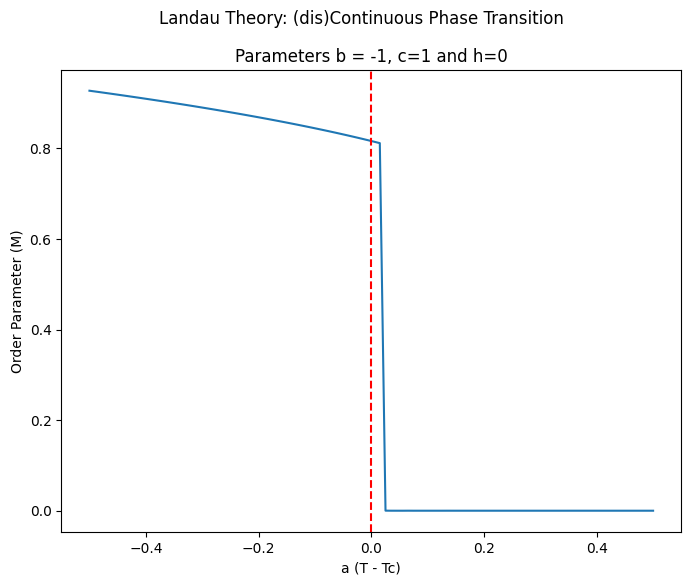

In [ ]:
#Landau theory simulation. Continuous phase transition
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Define Landau free energy function.
# Note that a here is A(T-Tc)
def landau_free_energy(M, a, b, c, h):
    return a * M**2 + b * M**4 +c * M**6 - h* M

# Minimize the Landau free energy to find equilibrium order parameter
a_values = np.linspace(-0.5, 0.5, 100)  # Varying 'a' around the critical point
b = -1  # Positive for continuous transition
c = 1
h = 0 # external field
M_eq = []

for a in a_values:
    result = minimize(landau_free_energy, x0=0.1, args=(a, b, c, h))
    M_eq.append(result.x[0])

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(a_values, M_eq, label="Equilibrium Order Parameter")
plt.axvline(0, color='r', linestyle='--', label="Critical Point")
plt.xlabel("a (T - Tc)")
plt.ylabel("Order Parameter (M)")
plt.suptitle("Landau Theory: (dis)Continuous Phase Transition")
plt.title(f"Parameters b = {b}, c={c} and h={h}", fontsize=12)
plt.show()

1. What is the effect of a finite external field h in the transition?

2. How would you generalize the code to account for discontinuous phase transitions?

3. And for a continuous symmetry? $\Psi \exp(i\phi)$


**Monte Carlo calculations**

We can also calculate magnetization as a function of temperature with numerical methods. Here you have a simple code that uses the Monte Carlo Method to calculate the magnetization for an Ising Model in 2 dimensions.

**Here we are using a CLASSICAL approach to the problem, in which the spins are +1 or -1.** For quantum spins, we would have to do a Quantum Monte Carlo simulation.

The Hamiltonian is

$H=- J \sum_{⟨ i,j ⟩} \sigma_i^z \sigma_j^z $

with $\sigma_i^z$ being $⇑$ (+1) or $⇓$ (-1).

In equilibrium, the possible spin configurations have an ocurrence probability proportional to the Boltzmann factor. If you have two configurations, A and B, and P(A) and P(B) are the probabilities of their occurrence:

$P(A)/P(B)= e^{-E_A/k_B T}/ e^{-E_B/k_B T}= e^{-(E_A-E_B)/k_B T}$.

The Metropolis algorithm uses this quantity to explore the possible configurations as a function of temperature.

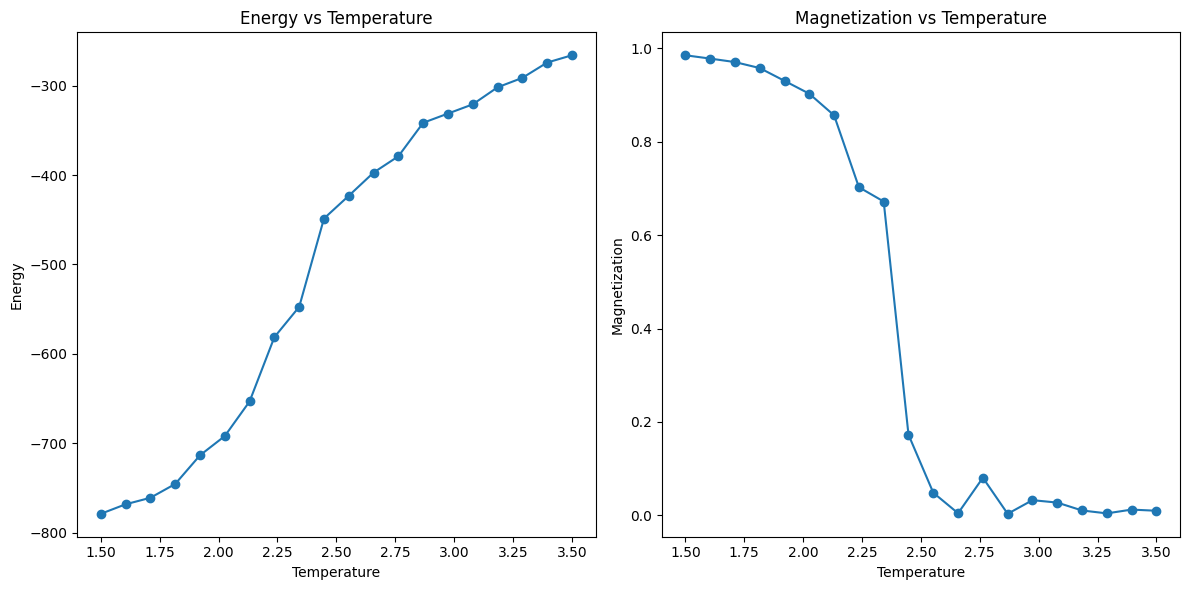

In [ ]:
# Ising Model Simulation (2D) – Monte Carlo Method
import numpy as np
import matplotlib.pyplot as plt

# Ising Model Parameters
L = 20  # Lattice size (LxL grid)  Small sizes lead to finite size effects.
T = np.linspace(1.5, 3.5, 20)  # Temperature range, and number of points
J = 1  # Interaction strength. J>0 would lead to ferromagnetism while J<0 to antiferromagnetism.
thermal_steps = 1000 #number of updates per temperature

# Initialize the lattice with random spins (+1 or -1)
def initialize_lattice(L):
    return np.random.choice([-1, 1], size=(L, L))

# Calculate total energy of the system
def calculate_energy(lattice):
    energy = 0
    for i in range(L):
        for j in range(L):
            S = lattice[i, j]
            neighbors = lattice[(i+1)%L, j] + lattice[i, (j+1)%L] + lattice[(i-1)%L, j] + lattice[i, (j-1)%L]
            energy += -J * S * neighbors
    return energy / 2  # To account for double counting

# Calculate magnetization
def calculate_magnetization(lattice):
    return np.sum(lattice)/(L*L) #normalize to system size

# Metropolis algorithm
# 1. Chooses a site randomly.
# 2. Calculates the energy dE associated to flipping the spin at that site.
# 3. If a random number is smaller than P(A)/P(B), the spin flip is accepted. Otherwise, the spin stays the same.
def metropolis_step(lattice, beta):
    for _ in range(L**2):  # Perform L^2 Monte Carlo steps.
        i = np.random.randint(0, L)
        j = np.random.randint(0, L)
        S = lattice[i, j]
        neighbors = lattice[(i+1)%L, j] + lattice[i, (j+1)%L] + lattice[(i-1)%L, j] + lattice[i, (j-1)%L]
        dE = 2 * J * S * neighbors
        if dE < 0 or np.random.rand() < np.exp(-dE * beta):
            lattice[i, j] *= -1

# Simulation
energy_list = []
magnetization_list = []

# Initizalize
lattice = initialize_lattice(L)

for temp in T:
    beta = 1 / temp
    measurements_energy = []  # Store energy measurements
    measurements_magnetization = []  # Store magnetization measurements

    # Thermalization: First thermal_steps
    for _ in range(thermal_steps):
        metropolis_step(lattice, beta)

    # Collect measurements every 10 steps to make averages.
    # This is a way of improving the statistics.
    # Another way would be to increase considerable the size of the spin system.
    for _ in range(1000):  # Next thermal_steps steps
        metropolis_step(lattice, beta)
        if _ % 10 == 0:  # Collect measurement every 10 steps
            energy = calculate_energy(lattice)
            magnetization = calculate_magnetization(lattice)
            measurements_energy.append(energy)
            measurements_magnetization.append(magnetization)

    # Average measurements
    avg_energy = np.mean(measurements_energy)
    avg_magnetization = np.mean(measurements_magnetization)

    # Append averages to the lists
    energy_list.append(avg_energy)
    magnetization_list.append(avg_magnetization)

# After animation, show energy and magnetization plots
plt.figure(figsize=(12, 6))

# Energy plot
plt.subplot(1, 2, 1)
plt.plot(T, energy_list, 'o-', label="Energy")
plt.xlabel("Temperature")
plt.ylabel("Energy")
plt.title("Energy vs Temperature")

# Magnetization plot
plt.subplot(1, 2, 2)
plt.plot(T, np.abs(magnetization_list), 'o-', label="Magnetization")
plt.xlabel("Temperature")
plt.ylabel("Magnetization")
plt.title("Magnetization vs Temperature")

plt.tight_layout()
plt.show()

The following code gives you snapshots of possible spin configurations for the 2D Ising model above. **Download and run locally.** The images are saved in a gif file.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# Ising Model Parameters
L = 20  # Lattice size (LxL grid)
T = np.linspace(1.5, 3.5, 20)  # Temperature range
J = 1  # Interaction strength

# Initialize the lattice with random spins (+1 or -1)
def initialize_lattice(L):
    return np.random.choice([-1, 1], size=(L, L))

# Metropolis algorithm
def metropolis_step(lattice, beta):
    for _ in range(L**2):  # Perform L^2 Monte Carlo steps
        i = np.random.randint(0, L)
        j = np.random.randint(0, L)
        S = lattice[i, j]
        neighbors = lattice[(i+1)%L, j] + lattice[i, (j+1)%L] + lattice[(i-1)%L, j] + lattice[i, (j-1)%L]
        dE = 2 * J * S * neighbors
        if dE < 0 or np.random.rand() < np.exp(-dE * beta):
            lattice[i, j] *= -1

# Prepare for animation
lattice = initialize_lattice(L)

# Create figure for animation
fig, ax = plt.subplots(figsize=(6, 6))
x, y = np.meshgrid(np.arange(L), np.arange(L))
#quiver draws arrows
quiver = ax.quiver(x, y, np.zeros_like(lattice), np.zeros_like(lattice), scale=1, scale_units='xy', pivot='middle')
ax.set_title("Lattice Configuration")
ax.axis("off")

# Update function for the animation
def update(frame):
    global lattice
    temp = T[frame]
    beta = 1 / temp
    for _ in range(1000):  # Update lattice
        metropolis_step(lattice, beta)
    # Update quiver plot
    U = np.zeros_like(lattice)
    V = lattice  # Spins (+1 or -1) determine arrow orientation
    quiver.set_UVC(U, V)
    ax.set_title(f"Lattice Configuration at T = {temp:.2f}")

# Create animation
ani = FuncAnimation(
    fig, update, frames=len(T), repeat=False, interval=500  # 500ms per frame
)

# Save animation
ani.save("animation_slowed.gif", writer=PillowWriter(fps=1))

print("Animation saved as 'animation_slowed.gif'.")

How would you modify the code for the XY model? In this case the spin orientations are given by an angle $\theta$ such that $S(\mathbf r)= S (\cos\theta,\sin\theta)$

PRACTICAL CLASS ON MAGNETISM

Code to calculate bands for a square lattice. This is the simplest case of a single band per site. The unit cell is a single site. You can change tx and ty by hand to see their effect.

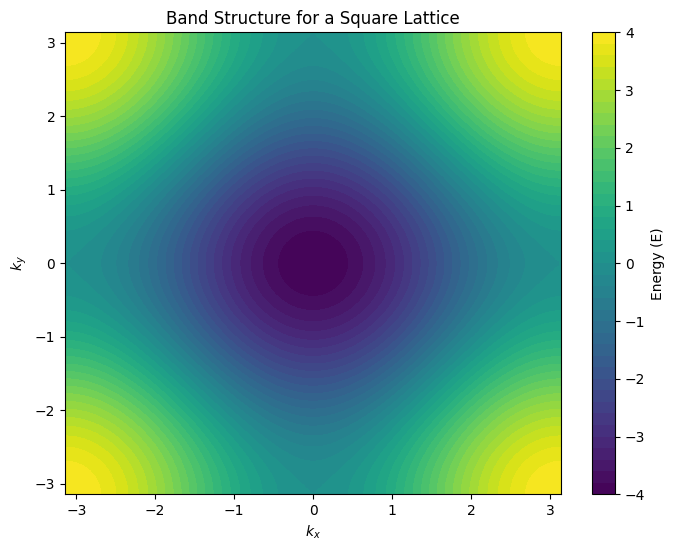

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_band_structure(tx, ty, num_k_points):
    """
    Calculates the band structure for a square lattice with 1 orbital per site.

    Parameters:
    tx (float): Hopping amplitude along the x-direction.
    ty (float): Hopping amplitude along the y-direction.
    num_k_points (int): Number of k-points along each direction in the Brillouin zone.

    Returns:
    np.ndarray: Array of eigenvalues (band energies) for each k-point.
    np.ndarray: kx, ky arrays for visualization.
    """
    # Define k-space grid
    kx = np.linspace(-np.pi, np.pi, num_k_points)
    ky = np.linspace(-np.pi, np.pi, num_k_points)
    kx_grid, ky_grid = np.meshgrid(kx, ky)

    # Compute band energies for each k-point
    energies = -2 * tx * np.cos(kx_grid) - 2 * ty * np.cos(ky_grid)

    return kx, ky, energies

def plot_band_structure(kx, ky, energies):
    """
    Plots the band structure.

    Parameters:
    kx, ky (np.ndarray): Arrays of kx and ky points.
    energies (np.ndarray): Array of band energies.
    """
    plt.figure(figsize=(8, 6))
    plt.contourf(kx, ky, energies, levels=50, cmap='viridis')
    plt.colorbar(label='Energy (E)')
    plt.title("Band Structure for a Square Lattice")
    plt.xlabel("$k_x$")
    plt.ylabel("$k_y$")
    plt.show()

# Parameters
tx = 1.0  # Hopping along x
ty = 1.0  # Hopping along y
num_k_points = 100  # Number of k-points

# Calculate and plot band structure
kx, ky, energies = calculate_band_structure(tx, ty, num_k_points)
plot_band_structure(kx, ky, energies)


Now, for the same case, the bands are plotted along high symmetry directions. You can play with the values of tx and ty.

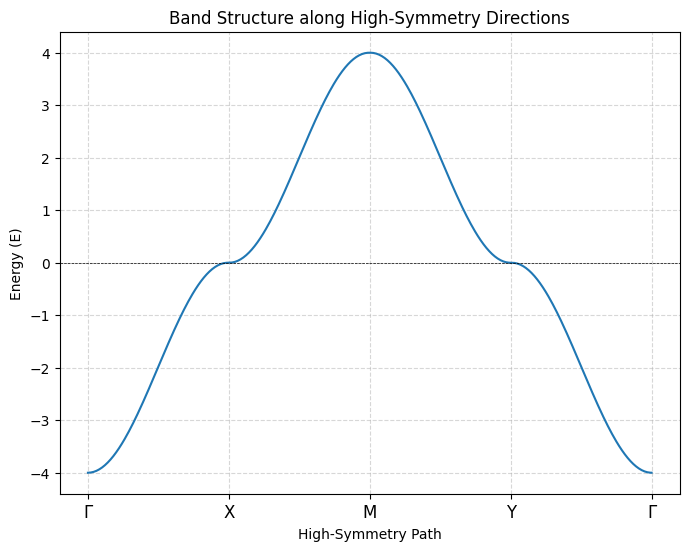

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def high_symmetry_band_structure(tx, ty, num_k_points=100):
    """
    Calculates the band energies along high-symmetry directions in the Brillouin zone.

    Parameters:
    tx (float): Hopping amplitude along the x-direction.
    ty (float): Hopping amplitude along the y-direction.
    num_k_points (int): Number of k-points along each high-symmetry path.

    Returns:
    np.ndarray: Energies along the high-symmetry path.
    list: Distances for plotting along the path.
    list: Labels of the high-symmetry points.
    """
    # High-symmetry points in the Brillouin zone
    gamma = np.array([0, 0])
    x = np.array([np.pi, 0])
    m = np.array([np.pi, np.pi])
    y = np.array([0, np.pi])

    # Path through high-symmetry points
    path = [gamma, x, m, y, gamma]
    path_labels = ["Γ", "X", "M", "Y", "Γ"]

    # Interpolate points along each segment
    k_path = []
    distances = [0]
    for i in range(len(path) - 1):
        start, end = path[i], path[i + 1]
        segment = np.linspace(start, end, num_k_points)
        k_path.append(segment)
        # Calculate the cumulative distance for x-axis scaling
        distance = np.linalg.norm(end - start)
        distances.append(distances[-1] + distance)

    # Flatten k-path into a single array for calculations
    k_path = np.vstack(k_path)
    # Compute band energies for each k-point
    energies = -2 * tx * np.cos(k_path[:, 0]) - 2 * ty * np.cos(k_path[:, 1])

    return energies, distances, path_labels

def plot_high_symmetry_band_structure(energies, distances, path_labels):
    """
    Plots the band structure along high-symmetry directions.

    Parameters:
    energies (np.ndarray): Energies along the high-symmetry path.
    distances (list): Distances for plotting along the path.
    path_labels (list of str): Labels of the high-symmetry points.
    """
    plt.figure(figsize=(8, 6))
    plt.plot(np.linspace(0, distances[-1], len(energies)), energies, label="Band")
    plt.xticks(distances, path_labels, fontsize=12)
    plt.axhline(0, color='k', linestyle='--', linewidth=0.5)
    plt.title("Band Structure along High-Symmetry Directions")
    plt.ylabel("Energy (E)")
    plt.xlabel("High-Symmetry Path")
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.show()

# Parameters
tx = 1.0  # Hopping along x
ty = 1.0  # Hopping along y
num_k_points = 100  # Number of k-points per segment

# Calculate and plot
energies, distances, path_labels = high_symmetry_band_structure(tx, ty, num_k_points)
plot_high_symmetry_band_structure(energies, distances, path_labels)



Now consider 2 orbitals per site. The hoppings involving the different orbitals can be different: hopping_11, hopping_22, hopping_12.
You can play here withe different values coming from Slater-Koster.


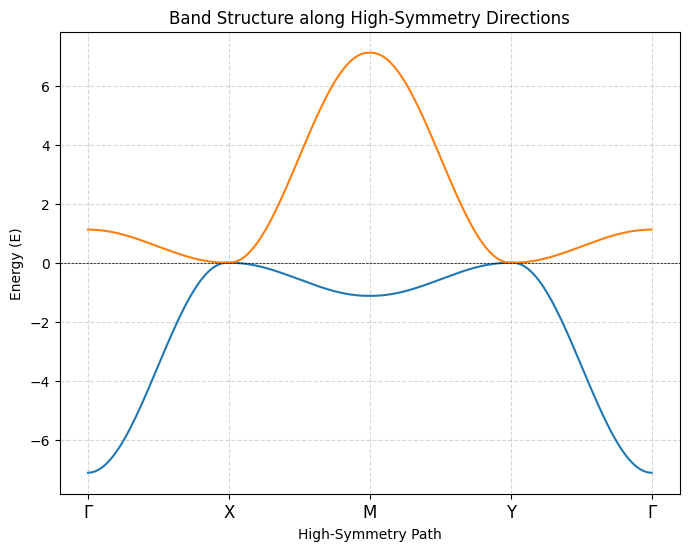

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def hamiltonian_k(hopping_11, hopping_22, hopping_12, kx, ky):
    """
    Constructs the Hamiltonian matrix for a unit cell with 1 site and 2 orbitals per site, considering nearest-neighbor hopping.

    Parameters:
    hopping_11 (float): Hopping amplitude between orbital 1 on neighboring sites.
    hopping_22 (float): Hopping amplitude between orbital 2 on neighboring sites.
    hopping_12 (float): Hopping amplitude between orbital 1 and orbital 2 on neighboring sites.
    kx (float): Wavevector component along x.
    ky (float): Wavevector component along y.

    Returns:
    np.ndarray: Hamiltonian matrix in k-space.
    """
    # Total number of orbitals in the unit cell: 2
    num_orbitals = 2
    H_k = np.zeros((num_orbitals, num_orbitals), dtype=complex)

    # Hopping terms (kx and ky contributions)
    # Diagonal terms: Orbital 1 to Orbital 1 and Orbital 2 to Orbital 2
    H_k[0, 0] = -2 * hopping_11 * (np.cos(kx) + np.cos(ky))  # Orbital 1
    H_k[1, 1] = -2 * hopping_22 * (np.cos(kx) + np.cos(ky))  # Orbital 2

    # Off-diagonal terms: Orbital 1 to Orbital 2 (and Hermitian conjugate)
    H_k[0, 1] = -2 * hopping_12 * (np.cos(kx) + np.cos(ky))  # Orbital 1 to Orbital 2
    H_k[1, 0] = np.conj(H_k[0, 1])  # Hermitian conjugate

    return H_k

def calculate_band_structure(hopping_11, hopping_22, hopping_12, num_k_points=100):
    """
    Calculates the band structure for a unit cell with 1 site and 2 orbitals per site.

    Parameters:
    hopping_11 (float): Hopping amplitude between orbital 1 on neighboring sites.
    hopping_22 (float): Hopping amplitude between orbital 2 on neighboring sites.
    hopping_12 (float): Hopping amplitude between orbital 1 and orbital 2 on neighboring sites.
    num_k_points (int): Number of k-points per high-symmetry segment.

    Returns:
    np.ndarray: Energies of all bands along the high-symmetry path.
    list: Distances for plotting along the path.
    list: Labels of the high-symmetry points.
    """
    # High-symmetry points in k-space
    gamma = np.array([0, 0])
    x = np.array([np.pi, 0])
    m = np.array([np.pi, np.pi])
    y = np.array([0, np.pi])

    # Path through high-symmetry points
    path = [gamma, x, m, y, gamma]
    path_labels = ["Γ", "X", "M", "Y", "Γ"]

    # Interpolate k-points along the path
    k_path = []
    distances = [0]
    for i in range(len(path) - 1):
        start, end = path[i], path[i + 1]
        segment = np.linspace(start, end, num_k_points)
        k_path.append(segment)
        # Calculate cumulative distance for x-axis
        distances.append(distances[-1] + np.linalg.norm(end - start))

    # Flatten k-path into an array
    k_path = np.vstack(k_path)
    energies = []

    # Calculate energies by diagonalizing the Hamiltonian at each k-point
    for kx, ky in k_path:
        H_k = hamiltonian_k(hopping_11, hopping_22, hopping_12, kx, ky)
        eigenvalues = np.linalg.eigvalsh(H_k)  # Compute eigenvalues
        energies.append(eigenvalues)

    return np.array(energies), distances, path_labels

def plot_band_structure(energies, distances, path_labels):
    """
    Plots the band structure along high-symmetry directions.

    Parameters:
    energies (np.ndarray): Energies of all bands along the high-symmetry path.
    distances (list): Distances for plotting along the path.
    path_labels (list of str): Labels of the high-symmetry points.
    """
    plt.figure(figsize=(8, 6))
    num_bands = energies.shape[1]
    for band in range(num_bands):
        plt.plot(np.linspace(0, distances[-1], len(energies)), energies[:, band], label=f"Band {band + 1}")

    plt.xticks(distances, path_labels, fontsize=12)
    plt.axhline(0, color='k', linestyle='--', linewidth=0.5)
    plt.title("Band Structure along High-Symmetry Directions")
    plt.ylabel("Energy (E)")
    plt.xlabel("High-Symmetry Path")
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.show()

# Parameters
hopping_11 = 1.0  # Hopping between orbital 1 on neighboring sites
hopping_22 = 0.5  # Hopping between orbital 2 on neighboring sites
hopping_12 = 1.0  # Hopping between orbital 1 and orbital 2 on neighboring sites.
num_k_points = 50  # Number of k-points per segment

# Calculate and plot
energies, distances, path_labels = calculate_band_structure(hopping_11, hopping_22, hopping_12, num_k_points)
plot_band_structure(energies, distances, path_labels)


Now we consider a 2x2 unit cell with 1 orbital per site. Having this unit cell allows you to have unequivalent sites: for instance, if you have two different atoms, they could have a different onsite-energy (not included in this version). If you increase the size of the unit cell, the reciprocal unit cell is decreased.

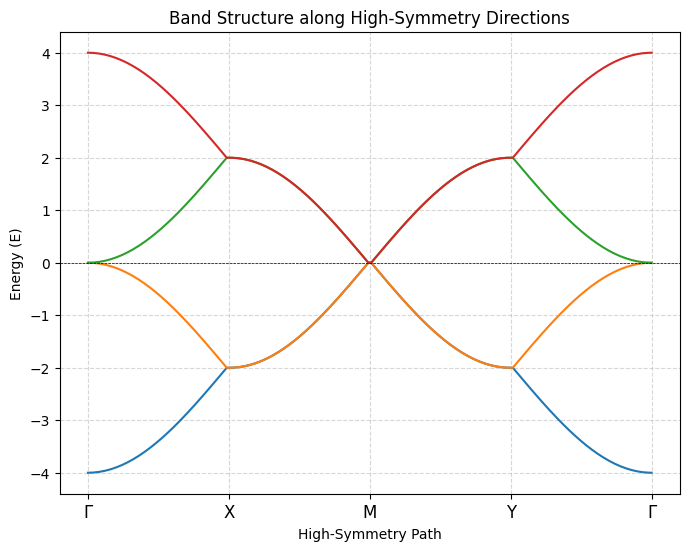

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def hamiltonian_k(hopping_x, hopping_y, kx, ky):
    """
    Constructs the Hamiltonian matrix for a unit cell with 2x2 sites and 1 orbital per site.

    Parameters:
    hopping_x (float): Hopping amplitude in the x-direction.
    hopping_y (float): Hopping amplitude in the y-direction.
    kx (float): Wavevector component along x.
    ky (float): Wavevector component along y.

    Returns:
    np.ndarray: Hamiltonian matrix in k-space.
    """
    # Total number of sites in the unit cell: 2x2 = 4
    num_sites = 4
    H_k = np.zeros((num_sites, num_sites), dtype=complex)

    # Hopping terms between nearest neighbors
    for i in range(4):  # Loop over 4 sites in the unit cell
        # Hopping along x (right neighbor)
        x_neighbor = (i + 1) % 2 + (i // 2) * 2  # Wrap horizontally
        H_k[i, x_neighbor] += hopping_x * np.exp(-1j * kx)
        H_k[x_neighbor, i] += hopping_x * np.exp(1j * kx)  # Hermitian conjugate

        # Hopping along y (upper neighbor)
        y_neighbor = (i + 2) % 4  # Wrap vertically
        H_k[i, y_neighbor] += hopping_y * np.exp(-1j * ky)
        H_k[y_neighbor, i] += hopping_y * np.exp(1j * ky)  # Hermitian conjugate

    return H_k

def calculate_band_structure(hopping_x, hopping_y, num_k_points=100):
    """
    Calculates the band structure for a 2x2 unit cell with 1 orbital per site.

    Parameters:
    hopping_x (float): Hopping amplitude in the x-direction.
    hopping_y (float): Hopping amplitude in the y-direction.
    num_k_points (int): Number of k-points per high-symmetry segment.

    Returns:
    np.ndarray: Energies of all bands along the high-symmetry path.
    list: Distances for plotting along the path.
    list: Labels of the high-symmetry points.
    """
    # High-symmetry points in k-space
    gamma = np.array([0, 0])
    x = np.array([np.pi/2, 0])
    m = np.array([np.pi/2, np.pi/2])
    y = np.array([0, np.pi/2])

    # Path through high-symmetry points
    path = [gamma, x, m, y, gamma]
    path_labels = ["Γ", "X", "M", "Y", "Γ"]

    # Interpolate k-points along the path
    k_path = []
    distances = [0]
    for i in range(len(path) - 1):
        start, end = path[i], path[i + 1]
        segment = np.linspace(start, end, num_k_points)
        k_path.append(segment)
        # Calculate cumulative distance for x-axis
        distances.append(distances[-1] + np.linalg.norm(end - start))

    # Flatten k-path into an array
    k_path = np.vstack(k_path)
    energies = []

    # Calculate energies by diagonalizing the Hamiltonian at each k-point
    for kx, ky in k_path:
        H_k = hamiltonian_k(hopping_x, hopping_y, kx, ky)
        eigenvalues = np.linalg.eigvalsh(H_k)  # Compute eigenvalues
        energies.append(eigenvalues)

    return np.array(energies), distances, path_labels

def plot_band_structure(energies, distances, path_labels):
    """
    Plots the band structure along high-symmetry directions.

    Parameters:
    energies (np.ndarray): Energies of all bands along the high-symmetry path.
    distances (list): Distances for plotting along the path.
    path_labels (list of str): Labels of the high-symmetry points.
    """
    plt.figure(figsize=(8, 6))
    num_bands = energies.shape[1]
    for band in range(num_bands):
        plt.plot(np.linspace(0, distances[-1], len(energies)), energies[:, band], label=f"Band {band + 1}")

    plt.xticks(distances, path_labels, fontsize=12)
    plt.axhline(0, color='k', linestyle='--', linewidth=0.5)
    plt.title("Band Structure along High-Symmetry Directions")
    plt.ylabel("Energy (E)")
    plt.xlabel("High-Symmetry Path")
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.show()

# Parameters
hopping_x = 1.0  # Hopping amplitude in the x-direction
hopping_y = 1.0  # Hopping amplitude in the y-direction
num_k_points = 50  # Number of k-points per segment

# Calculate and plot
energies, distances, path_labels = calculate_band_structure(hopping_x, hopping_y, num_k_points)
plot_band_structure(energies, distances, path_labels)


Let's diagonalize the 1D spin 1/2 Heisenberg chain. We can compare the result here with the Bethe Ansatz result.

In [ ]:
import numpy as np
from scipy.linalg import eig

# Define parameters
N = 4  # Number of spins
J = -1  # Exchange interaction constant. Note J>0 for AF and J<0 for FM.

# Generate the spin operators for a single site
Sx = 0.5 * np.array([[0, 1], [1, 0]])
Sy = 0.5 * np.array([[0, -1j], [1j, 0]])
Sz = 0.5 * np.array([[1, 0], [0, -1]])
I = np.eye(2)  # Identity matrix

# Create full Hilbert space size
dim = 2 ** N

# Generate the full spin operators for the lattice
def full_operator(op, site, N):
    """Constructs the full operator for the lattice."""
    ops = [I] * N
    ops[site] = op
    result = ops[0]
    for i in range(1, N):
        result = np.kron(result, ops[i])
    return result

# Build the Hamiltonian
H = np.zeros((dim, dim), dtype=np.complex128)
for i in range(N):
    # Define neighboring spins (with periodic boundary conditions)
    j = (i + 1) % N
    H += J * (
        np.dot(full_operator(Sx, i, N), full_operator(Sx, j, N)) +
        np.dot(full_operator(Sy, i, N), full_operator(Sy, j, N)) +
        np.dot(full_operator(Sz, i, N), full_operator(Sz, j, N))
    )

# Build the total Sz operator
Sz_total = np.zeros((dim, dim), dtype=np.complex128)
for i in range(N):
    Sz_total += full_operator(Sz, i, N)

# Build the computational basis states and count spins
basis_states = []
for i in range(dim):
    state = np.array([int(b) for b in format(i, f'0{N}b')])  # Binary representation
    spins = 0.5 * (2 * state - 1)  # Map {0, 1} -> {-1/2, +1/2}
    basis_states.append(spins)

# Group states by S^z
sectors = {}
for i, state in enumerate(basis_states):
    sz = int(np.sum(state))
    if sz not in sectors:
        sectors[sz] = []
    sectors[sz].append(i)

# For each S^z sector
# diagonalize the reduced Hamiltonian
all_results = {}
for sz, indices in sorted(sectors.items()):
    # Extract the subspace for this S^z
    H_reduced = H[np.ix_(indices, indices)]

    # Perform diagonalization. Calculate both eigenvalues and eigenvectors
    eigenvalues, eigenvectors = eig(H_reduced)
    eigenvalues = np.real_if_close(eigenvalues)  # Ensure real eigenvalues

    # Sort eigenvalues and eigenvectors together
    sorted_indices = np.argsort(eigenvalues)
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]

    # Print results
    print(f"S^z = {sz:.1f}:")
    print(f"Eigenvalues: {eigenvalues}")
    print(f"Shifted Eigenvalues (E - E_0): {eigenvalues - np.min(eigenvalues)}")
    print("Eigenvectors (each row corresponds to an eigenvector):")

    for i, vec in enumerate(eigenvectors.T):  # Transpose to iterate over eigenvectors
        print(f"Eigenvector {i+1}: {np.real_if_close(vec)}")
    print()


S^z = -2.0:
Eigenvalues: [-1.]
Shifted Eigenvalues (E - E_0): [0.]
Eigenvectors (each row corresponds to an eigenvector):
Eigenvector 1: [1.]

S^z = -1.0:
Eigenvalues: [-1.00000000e+00 -3.21404863e-17  0.00000000e+00  1.00000000e+00]
Shifted Eigenvalues (E - E_0): [0. 1. 1. 2.]
Eigenvectors (each row corresponds to an eigenvector):
Eigenvector 1: [0.5 0.5 0.5 0.5]
Eigenvector 2: [ 7.07106781e-01  7.63278329e-17 -7.07106781e-01  1.38777878e-17]
Eigenvector 3: [-0.          0.70710678 -0.         -0.70710678]
Eigenvector 4: [ 0.5 -0.5  0.5 -0.5]

S^z = 0.0:
Eigenvalues: [-1.00000000e+00 -1.36845553e-48  0.00000000e+00  1.79450672e-16
  1.00000000e+00  2.00000000e+00]
Shifted Eigenvalues (E - E_0): [0. 1. 1. 1. 2. 3.]
Eigenvectors (each row corresponds to an eigenvector):
Eigenvector 1: [0.40824829 0.40824829 0.40824829 0.40824829 0.40824829 0.40824829]
Eigenvector 2: [-1.15896785e-16-2.90566752e-25j  2.63883964e-32+1.98700615e-25j
 -5.77350269e-01-4.60588938e-09j -2.11324865e-01+4.605889